## Table of Contents

1. Loading the dataset
2. Data Pre-processing
3. Rule 1 - Extracting the sentences with President's mention
4. Rule 2 - Extracting the mentions of initiatives
5. Rule 3 - Relation Extraction part 1
6. Rule 4 - Relation Extraction part 2
7. Combining Rule 3 and Rule 4
8. Rule 5: Patterns using Preposition

## 1. Loading the dataset

## 2. Data Pre-processing

In [1]:
# importing libraries
import glob
import pandas as pd
import re

In [6]:
# names of all the folders in the dataset
folders = glob.glob('Converted sessions/Session*')

In [4]:
folders = glob.glob("d:/LargeData/analytics_vidhya_united_nations/Session*")

In [5]:
# list of folders
folders

['d:/LargeData/analytics_vidhya_united_nations\\Session 42 - 1987',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 43 - 1988',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 44 - 1989',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 45 - 1990',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 46 - 1991',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 47 - 1992',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 48 - 1993',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 49 - 1994',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 50 - 1995',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 51 - 1996',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 52 - 1997',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 53 - 1998',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 54 - 1999',
 'd:/LargeData/analytics_vidhya_united_nations\\Session 55 - 2000',
 'd:/LargeData/analytics_vidhya_united_nations\\

In [6]:
# creating a Dataframe to store the speeches
df = pd.DataFrame(columns={'Country','Speech','Session','Year'})

In [7]:
# read speeches by USA
i = 0 
# for each folder
for file in folders:
    # getting the txt file containing speech of USA    
    speech = glob.glob(file+'/USA*.txt')
    # reading the txt file
    with open(speech[0],encoding='utf8') as f:
        # reading the speech
        df.loc[i,'Speech'] = f.read()
        # extracting the year of speech
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # extracting the session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # storing the country name
        df.loc[i,'Country'] = speech[0].split('_')[0].split("/")[-1]
        # Increment counter
        i += 1

In [8]:
# first 5 rows of the created dataset    
df.head()

,Session,Country,Year,Speech
0,42,analytics,1987,﻿Let me first welcome the Secretary-General ba...
1,43,analytics,1988,"﻿\nHalf a world away from this place of peace,..."
2,44,analytics,1989,﻿I am honoured to address the General Assembly...
3,45,analytics,1990,﻿\nIt is really a great privilege to greet you...
4,46,analytics,1991,﻿I am honoured to speak with you as you open t...


In [9]:
# sample speech from the dataset
df['Speech'][1]

'\ufeff\nHalf a world away from this place of peace, the firing, the killing, the bloodshed in two merciless conflicts have for the first time in recent memory diminished. After terrible new names, names such as Halabja, Maidan Shahr and Spin Buldak, have been added to the toll-call of human horror, there is today hope of peace in the Persian Gulf and Afghanistan.\nSo too, in the highlands and coastal cities of southern Africa, places of civil war, places of occupation by foreign troops, talk of peace is heard, peace for the tortured nation of Angola. Sixty-five hundred miles east, in the South-East Asian country of Cambodia, there is hope now of a settlement and the removal of Viet Nam\'s occupying forces. Finally, in this hemisphere, where only 12 years ago one third of the people of Latin America lived under democratic rule, some 90 per cent do so today. And especially in Central America, nations such as El Salvador, once threatened by the anarchy of the death squad and the spectre 

In [10]:
# function to preprocess speech
def clean(text):
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
        
    return text

In [11]:
# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [12]:
# first 5 rows of the dataset
df.head()

,Session,Country,Year,Speech,Speech_clean
0,42,analytics,1987,﻿Let me first welcome the Secretary-General ba...,﻿Let me first welcome the Secretary General ba...
1,43,analytics,1988,"﻿\nHalf a world away from this place of peace,...","﻿ Half a world away from this place of peace, ..."
2,44,analytics,1989,﻿I am honoured to address the General Assembly...,﻿I am honoured to address the General Assembly...
3,45,analytics,1990,﻿\nIt is really a great privilege to greet you...,﻿ It is really a great privilege to greet you ...
4,46,analytics,1991,﻿I am honoured to speak with you as you open t...,﻿I am honoured to speak with you as you open t...


In [13]:
# sample cleaned speech
df['Speech_clean'][1]

"\ufeff Half a world away from this place of peace, the firing, the killing, the bloodshed in two merciless conflicts have for the first time in recent memory diminished. After terrible new names, names such as Halabja, Maidan Shahr and Spin Buldak, have been added to the toll call of human horror, there is today hope of peace in the Persian Gulf and Afghanistan. So too, in the highlands and coastal cities of southern Africa, places of civil war, places of occupation by foreign troops, talk of peace is heard, peace for the tortured nation of Angola. Sixty five hundred miles east, in the South East Asian country of Cambodia, there is hope now of a settlement and the removal of Viet Nam occupying forces. Finally, in this hemisphere, where only 12 years ago one third of the people of Latin America lived under democratic rule, some 90 per cent do so today. And especially in Central America, nations such as El Salvador, once threatened by the anarchy of the death squad and the spectre of to

In [14]:
# splitting sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [15]:
# creating a new column to store the sentences
df['Sentence'] = df['Speech_clean'].apply(sentences)

In [16]:
# first 5 rows
df.head()

,Session,Country,Year,Speech,Speech_clean,Sentence
0,42,analytics,1987,﻿Let me first welcome the Secretary-General ba...,﻿Let me first welcome the Secretary General ba...,[﻿Let me first welcome the Secretary General b...
1,43,analytics,1988,"﻿\nHalf a world away from this place of peace,...","﻿ Half a world away from this place of peace, ...","[﻿ Half a world away from this place of peace,..."
2,44,analytics,1989,﻿I am honoured to address the General Assembly...,﻿I am honoured to address the General Assembly...,[﻿I am honoured to address the General Assembl...
3,45,analytics,1990,﻿\nIt is really a great privilege to greet you...,﻿ It is really a great privilege to greet you ...,[﻿ It is really a great privilege to greet you...
4,46,analytics,1991,﻿I am honoured to speak with you as you open t...,﻿I am honoured to speak with you as you open t...,[﻿I am honoured to speak with you as you open ...


In [17]:
# sample sentence list from the dataset
df['Sentence'][1]

['\ufeff Half a world away from this place of peace, the firing, the killing, the bloodshed in two merciless conflicts have for the first time in recent memory diminished',
 ' After terrible new names, names such as Halabja, Maidan Shahr and Spin Buldak, have been added to the toll call of human horror, there is today hope of peace in the Persian Gulf and Afghanistan',
 ' So too, in the highlands and coastal cities of southern Africa, places of civil war, places of occupation by foreign troops, talk of peace is heard, peace for the tortured nation of Angola',
 ' Sixty five hundred miles east, in the South East Asian country of Cambodia, there is hope now of a settlement and the removal of Viet Nam occupying forces',
 ' Finally, in this hemisphere, where only 12 years ago one third of the people of Latin America lived under democratic rule, some 90 per cent do so today',
 ' And especially in Central America, nations such as El Salvador, once threatened by the anarchy of the death squad 

In [18]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sentence','Year','Len'])

row_list = []

# for each speech
for i in range(len(df)):
    # for each sentence
    for sent in df.loc[i,'Sentence']:
    
        # calculating the word count in a sentence
        wordcount = len(sent.split())
        # extracting the year of speech
        year = df.loc[i,'Year']

        dict1 = {'Year':year,'Sentence':sent,'Len':wordcount}
        # If we were not looking at only the US speeches, adding the Country would be helpful above.
        row_list.append(dict1)
    
df2 = pd.DataFrame(row_list)

In [19]:
# first 5 rows
df2.head()

,Year,Sentence,Len
0,1987,﻿Let me first welcome the Secretary General ba...,17
1,1987,Hundreds of thousands have already fallen in ...,14
2,1987,All men and women of goodwill pray that the c...,40
3,1987,"Mr Secretary General, the United States suppo...",17
4,1987,"Like the Secretary General, all of us here to...",15


In [20]:
# shape of the dataset
df2.shape

(8948, 3)

Sample sentences from dataset:

1.  For that reason, **President Reagan**, in his speech to this body last year, proposed that the United States and the Soviet Union exchange visits of experts at test sites to measure directly the yields of nuclear weapon test
2.  **President Reagan** has directed our scientists and engineers to examine, in the light of new technologies and fully in accord with the Anti Ballistic Missile Treaty   the feasibility of defense against ballistic missile attack
3.   **President Reagan** approach to foreign policy is  grounded squarely on standards drawn from the  pragmatic American experience
4.  Let me start by joining the **President of Brazil** in conveying to the people and Government of Mexico our deep sympathy over the devastation wrought by earthquakes and our solidarity with them as they work to recover and rebuild

## 3. Rule 1 - Extracting the sentences with President's mention

Using Spacy matcher

In [21]:
# importing spacy and its matcher function
import spacy
from spacy.matcher import Matcher

# load english language model
nlp = spacy.load('en_core_web_sm', disable=['ner','textcat'])

In [22]:
# function to find sentences mentioning president
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern
    pattern = [{'LOWER':'president'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", None, pattern) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
            
    return names

In [23]:
# extracting sentences with president's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_names(df2['Sentence'][i]))

# storing the extracted sentences in the dataframe
df2['President_Names'] = extracted_sentences

In [24]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names
0,1987,﻿Let me first welcome the Secretary General ba...,17,[]
1,1987,Hundreds of thousands have already fallen in ...,14,[]
2,1987,All men and women of goodwill pray that the c...,40,[]
3,1987,"Mr Secretary General, the United States suppo...",17,[]
4,1987,"Like the Secretary General, all of us here to...",15,[]


In [25]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        mention.append(df2['President_Names'][i])

mention

[['President Sarney'],
 ['President of Iran'],
 ['President Abraham'],
 ['President de'],
 ['President Kennedy'],
 ['President Roosevelt'],
 ['President Al'],
 ['President Gore'],
 ['President Menem'],
 ['President Aristide'],
 ['President Aristide'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Yeltsin'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Kennedy'],
 ['President Yeltsin'],
 ['President Kennedy'],
 ['President Kennedy'],
 ['President Mugabe'],
 ['President Yeltsin'],
 ['President C1inton'],
 ['President Clinton'],
 ['President Bush'],
 ['President Bush'],
 ['President Bush'],
 ['President Ping'],
 ['President Eliasson'],
 ['President Bush'],
 ['President Talabani'],
 ['President Abbas'],
 ['President Abbas'],
 ['President Harry'],
 ['President Abbas'],
 ['President Abbas'],
 ['President in Colombia'],
 ['President Franklin'],
 ['President Saleh'],
 ['President Truman'],
 ['President in Somalia'],

In [26]:
# extracting only those sentences which has president's mention
sentences_president = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        sentences_president.append(df2['Sentence'][i])

sentences_president

[' President Sarney of Brazil spoke for many others when he said that Private initiative is the engine of economic Development',
 ' In that regard, I know that the President of Iran will be addressing representatives tomorrow',
 ' There is a painting that hangs on the wall of my office in the White House which pictures President Abraham Lincoln and his generals meeting near the end of a war that remains the bloodiest in the history of my country',
 ' We see Nelson Mandela stand side by side with President de Klerk proclaiming a date for South Africa’s first non racial elections',
 ' Thirty two years ago President Kennedy warned this Assembly that humanity lived under a nuclear sword of Damocles that hung by the slenderest of threads',
 ' But I agree with President Roosevelt, who once said: The democratic aspiration is no mere recent phase of human history',
 ' Here in the United States, Vice President Al Gore and I have launched an effort literally to reinvent how our Government operat

In [27]:
# number of sentences containing president's mention
len(sentences_president)

107

In [28]:
# sample sentences with president's mention
sentences_president[1]

' In that regard, I know that the President of Iran will be addressing representatives tomorrow'

In [29]:
# sample sentences with president's mention
sentences_president[10]

' In the spirit of reconciliation and reconstruction, President Aristide yesterday called for the immediate easing of sanctions so that the work of rebuilding can begin immediately'

Sample sentences from dataset:
1. The United States will continue its strong efforts to advance **the United Nations plan** for Namibia
2. The United States and Italy have proposed **a Global Peace Operations Initiative**
3. For 35 years, **the North Atlantic alliance** has guaranteed the peace in Europe

## 4. Rule 2 - Extracting the mentions of initiatives
Understand the different plans the UN mentioned.

In [30]:
# to check if keyswords like 'programs','schemes', etc. are present in sentences

def prog_sent(text):
    
    patterns = [r'\b(?i)'+'plan'+r'\b',
               r'\b(?i)'+'programme'+r'\b',
               r'\b(?i)'+'scheme'+r'\b',
               r'\b(?i)'+'campaign'+r'\b',
               r'\b(?i)'+'initiative'+r'\b',
               r'\b(?i)'+'conference'+r'\b',
               r'\b(?i)'+'agreement'+r'\b',
               r'\b(?i)'+'alliance'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag 

# apply function
df2['Check_Schemes'] = df2['Sentence'].apply(prog_sent)

<ipython-input-30-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)plan\\b'
  if re.search(pat, text) != None:
<ipython-input-30-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)programme\\b'
  if re.search(pat, text) != None:
<ipython-input-30-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)scheme\\b'
  if re.search(pat, text) != None:
<ipython-input-30-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)campaign\\b'
  if re.search(pat, text) != None:
<ipython-input-30-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)initiative\\b'
  if re.search(pat, text) != None:
<ipython-input-30-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)conference\\b'
  if re.search(pat, text) != None:
<ipython-input-30-1f6d10d8dcbb>:17: DeprecationWarning: Flags not at the start of t

In [31]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes
0,1987,﻿Let me first welcome the Secretary General ba...,17,[],0
1,1987,Hundreds of thousands have already fallen in ...,14,[],0
2,1987,All men and women of goodwill pray that the c...,40,[],0
3,1987,"Mr Secretary General, the United States suppo...",17,[],0
4,1987,"Like the Secretary General, all of us here to...",15,[],0


The plans appear to be described with in 5 words .  SO create a rule around this.

In [32]:
# to extract initiatives using pattern matching
def all_schemes(text,check):
    
    schemes = []
    
    doc = nlp(text)
    
    # initiatives
    prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']
    
    # pattern to match initiatives names 
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]
    
    if check == 0:
        # return blank list
        return schemes

    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("matching", None, pattern) 
    matches = matcher(doc)

    for i in range(0,len(matches)):
        
        # match: id, start, end
        start, end = matches[i][1], matches[i][2]
        
        if doc[start].pos_=='DET':
            start = start+1
        
        # matched string
        span = str(doc[start:end])
        
        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)
        
    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sentence,x.Check_Schemes),axis=1)

In [33]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes,Schemes1
0,1987,﻿Let me first welcome the Secretary General ba...,17,[],0,[]
1,1987,Hundreds of thousands have already fallen in ...,14,[],0,[]
2,1987,All men and women of goodwill pray that the c...,40,[],0,[]
3,1987,"Mr Secretary General, the United States suppo...",17,[],0,[]
4,1987,"Like the Secretary General, all of us here to...",15,[],0,[]


In [35]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        mention.append(df2['Schemes1'][i])

mention

[['San Francisco Conference'],
 ['North American Free Trade Agreement'],
 ['North American Free Trade Agreement'],
 ['United Nations Conference'],
 ['United Nations International Drug Control Programme'],
 ['Good Friday Agreement'],
 ['United Nations Development Programme', 'World Food Programme'],
 ['African Crisis Response Initiative'],
 ['World Food Programme'],
 ['Proliferation Security Initiative'],
 ['Proliferation Security Initiative'],
 ['Global Peace Operations Initiative'],
 ['San Francisco Conference'],
 ['Comprehensive Peace Agreement'],
 ['Arab Peace Initiative'],
 ['San Francisco Conference'],
 ['Women Entrepreneurs Finance Initiative'],
 ['United States initiative'],
 ['United Nations Conference'],
 ['Suez Canal agreement'],
 ['World Food Conference'],
 ['World Population Conference', 'World Food Conference'],
 ['Third United Nations Conference'],
 ['Geneva Peace Conference'],
 ['Geneva Peace Conference'],
 ['Bonn Economic Summit Conference'],
 ['Bonn Economic Summit Con

In [36]:
# extracting sentences which mentions some initiatives
initiatives = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        initiatives.append(df2['Sentence'][i])

initiatives

[' Like most of the people in the world today, I was not even alive during the convulsive world war that convinced humankind of the need for this Organization, nor during the San Francisco Conference that led to its birth',
 ' We will work to strengthen the free market democracies by revitalizing our economy at home, by opening world trade through GATT, the North American Free Trade Agreement and other accords, and by updating our shared institutions, asking with you and answering the hard questions about whether they are adequate to the present challenges',
 ' Though still in its infancy, the North American Free Trade Agreement has dramatically increased trade between the United States and Mexico and has produced in the United States alone an estimated 200,000 new jobs',
 ' We should ensure that the functions of the United Nations Conference on Trade and Development do not duplicate those of the new World Trade Organization , and we should adopt a moratorium on big United Nations conf

In [37]:
# number of sentences which mentions some initiatives
len(initiatives)

40

In [38]:
# sample sentences containing initiatives
initiatives[0]

' Like most of the people in the world today, I was not even alive during the convulsive world war that convinced humankind of the need for this Organization, nor during the San Francisco Conference that led to its birth'

In [39]:
# sample sentences containing initiatives
initiatives[3]

' We should ensure that the functions of the United Nations Conference on Trade and Development do not duplicate those of the new World Trade Organization , and we should adopt a moratorium on big United Nations conferences once the present series is completed, concentrating instead on meeting the commitments of those conferences that we have already held'

## 5. Rule 3 - Relation Extraction part 1

Sample sentences from dataset:
1.   The United **States** will **support** these **principles**
2.    Yet these very small **entities need** more than most the **assistance** that the United Nations system can provide
3.  I have proposed to Congress that the United **States provide** additional **funding** for our work in Iraq, the greatest financial commitment of its kind since the Marshall Plan

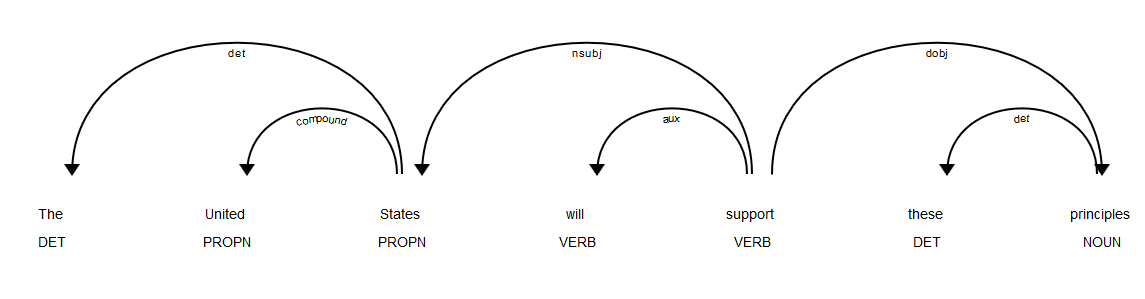

In [43]:
# function for rule 3: noun(subject), verb, noun(object)
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [44]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule3 = pd.DataFrame(row_list)

In [45]:
# first 5 rows
df_rule3.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[world make advances]
1,1972,"In 1972 alone, the United States and the Sovi...",[]
2,1972,The Soviet Union and the United States have a...,[Union place limitations]
3,1972,The United States and the People Republic of ...,[]
4,1972,"The United Kingdom, France, the Soviet Union ...",[]


In [46]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule3.columns)

for row in range(len(df_rule3)):
    
    if len(df_rule3.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule3.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [47]:
df_show.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[world make advances]
1,1972,The Soviet Union and the United States have a...,[Union place limitations]
2,1972,The Federal Republic of Germany and the Germa...,[Republic open negotiations]
3,1972,And North and South Korea have intensified th...,[Korea intensify talks]
4,1972,"If continued, this process will in time find ...",[process find reflection]


In [48]:
# number of outputs
df_show.shape

(3364, 3)

In [49]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [50]:
# first 5 rows
df_sep.head()

,Sentence,Year,Noun1,Verb,Noun2
0,During the past few years the world has made r...,1972,[world],make,[advances]
1,The Soviet Union and the United States have a...,1972,[Union],place,[limitations]
2,The Federal Republic of Germany and the Germa...,1972,[Republic],open,[negotiations]
3,And North and South Korea have intensified th...,1972,[Korea],intensify,[talks]
4,"If continued, this process will in time find ...",1972,[process],find,[reflection]


In [51]:
# top 10 verbs
df_sep['Verb'].value_counts()[:10]

take       143
make       119
support     91
give        79
see         78
face        55
seek        52
build       50
pursue      48
require     45
Name: Verb, dtype: int64

In [52]:
# selecting a verb and looking at its patterns
df_sep[df_sep['Verb']=='support'].head(15)

,Sentence,Year,Noun1,Verb,Noun2
14,"And, in recognition of the importance of trad...",1972,[we],support,[participation]
29,From the start the United States has supporte...,1972,[States],support,[effort]
67,As we support the historic growth of democra...,1992,[we],support,[growth]
79,We fully support the efforts of the North At...,1992,[We],support,[efforts]
151,That is why we have supported the efforts of ...,1999,[we],support,[efforts]
172,"As I think most Members know, I have strongly...",1999,[I],support,[States]
245,The United States supports political and econ...,2002,[States],support,[liberty]
265,Those names include a man who supported his w...,2001,[who],support,[wife]
372,The United States strongly supports his leade...,1997,[States],support,[leadership]
389,We must support the principles of non interve...,1980,[We],support,[principles]


## 6. Rule 4: Relation Extraction part 2

Sample sentences from the dataset:
1.  With support from **many countries**, we have made **impressive progress**
2.  Because of their **unique expertise** and regional legitimacy, they can be instruments for solving some of the **hardest challenges** we face
3.  We are right to aim high and take on the **mightiest tasks**

In [53]:
from spacy import displacy 
displacy.render(nlp("With support from many countries, we have made impressive progress"), style='dep',jupyter=True)

In [54]:
# function for rule 4
def rule4(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [55]:
# create a df containing sentence and its output for rule 4
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    # rule
    output = rule4(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule4 = pd.DataFrame(row_list)

In [56]:
# first 5 rows
df_rule4.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[past few years, remarkable advances, Charter ..."
1,1972,"In 1972 alone, the United States and the Sovi...","[military confrontations, sovereign equality, ..."
2,1972,The Soviet Union and the United States have a...,"[precise limitations, next years, offensive mi..."
3,1972,The United States and the People Republic of ...,[]
4,1972,"The United Kingdom, France, the Soviet Union ...","[specific provisions, unimpeded movement]"


In [57]:
# selecting non-empty outputs
df_show = pd.DataFrame(columns=df_rule4.columns)

for row in range(len(df_rule4)):
    
    if len(df_rule4.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule4.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [58]:
# number of matches 
df_show.shape

(6167, 3)

In [59]:
# first 15 rows
df_show.head(15)

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[past few years, remarkable advances, Charter ..."
1,1972,"In 1972 alone, the United States and the Sovi...","[military confrontations, sovereign equality, ..."
2,1972,The Soviet Union and the United States have a...,"[precise limitations, next years, offensive mi..."
3,1972,"The United Kingdom, France, the Soviet Union ...","[specific provisions, unimpeded movement]"
4,1972,And North and South Korea have intensified th...,"[divided families, joint committee]"
5,1972,There have been many other accomplishments in...,[Charter objectives]
6,1972,I mention these merely to illustrate how old ...,[old patterns]
7,1972,"If continued, this process will in time find ...",[positive reflection]
8,1972,"We are encouraged, too, by calls in both East...",[Eastern capitals]
9,1972,A step toward realizing this goal would be th...,"[stable military balance, force reductions]"


### 7. Combining Rule 3 and Rule 4

Sample sentences:
1.  With support from many countries, **we** have **made impressive progress**
2. **It** will **require military planners** the world over to recognize that training for peace operations is a legitimate part of every nation security strategy

In [60]:
# modifying rule 4
def rule4_mod(text,index):
    
    doc = nlp(text)

    phrase = ''
    
    # iterate over tokens
    for token in doc:
        
        if token.i == index:
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [61]:
# using rule 3 and rule 4
def rule3_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # look for subject modifier
                    adj = rule4_mod(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                            
                            # look for object modifier
                            adj = rule4_mod(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [62]:
# create a df containing sentence and its output for modified rule
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3_mod(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule = pd.DataFrame(row_list)

In [63]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[ world make remarkable advances]
1,1972,"In 1972 alone, the United States and the Sovi...",[]
2,1972,The Soviet Union and the United States have a...,[ Soviet Union place precise limitations]
3,1972,The United States and the People Republic of ...,[]
4,1972,"The United Kingdom, France, the Soviet Union ...",[]


In [64]:
# selecting non-empty outputs
df_show_mod = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show_mod = df_show_mod.append(df_rule.loc[row,:])

# reset the index
df_show_mod.reset_index(inplace=True, drop=True)

In [65]:
# number of matches
df_show_mod.shape

(3364, 3)

In [66]:
# first 15 rows
df_show_mod.head(20)

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[ world make remarkable advances]
1,1972,The Soviet Union and the United States have a...,[ Soviet Union place precise limitations]
2,1972,The Federal Republic of Germany and the Germa...,[ Federal Republic open negotiations]
3,1972,And North and South Korea have intensified th...,[ Korea intensify talks]
4,1972,"If continued, this process will in time find ...",[ process find positive reflection]
5,1972,A conference whose over all effect was to put...,[ conference prolong problems]
6,1972,"On the other hand, a conference which promote...",[ conference reinforce trend]
7,1972,That is why we believe that the conference mu...,[ conference take practical steps]
8,1972,We are also now studying alternative approach...,[ We study alternative approaches]
9,1972,The United States will pursue the following g...,[ United States pursue general aims]


In [67]:
# Sample sentence
print(df_show_mod.loc[4,'Output'])
print(df_show_mod.loc[4,'Sentence'])

[' process find positive reflection']
 If continued, this process will in time find positive reflection within the United Nations itself


In [68]:
# Sample sentence
print(df_show_mod.loc[17,'Output'])
print(df_show_mod.loc[17,'Sentence'])

[' President Nixon pledge major effort']
 President Nixon has also pledged a major effort to assist both VietNamese States in post war reconstruction


## 8. Rule 5: Patterns using Preposition

Sample sentences:
1.  We all believe the **benefits of globalization** must be allocated more broadly within and among societies
2. As the Millennium Summit reflected, we have no **shortage of** worthy **goals**
3. It should preserve the special **responsibility for peacekeeping** of the Security Council permanent members

In [69]:
# Sample sentence
from spacy import displacy 
displacy.render(nlp('''We all believe the benefits of globalization must 
be allocated more broadly within and among societies'''), 
                style='dep',jupyter=True)

In [70]:
# rule 5 function
def rule5(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [71]:
# create a df containing sentence and its output for rule 5
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    
    # rule
    output = rule5(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [72]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[advances toward goal, goal of, peace with]"
1,1972,"In 1972 alone, the United States and the Sovi...","[equality of countries, interference in affairs]"
2,1972,The Soviet Union and the United States have a...,[]
3,1972,The United States and the People Republic of ...,"[understanding between peoples, relations betw..."
4,1972,"The United Kingdom, France, the Soviet Union ...",[]


In [73]:
# select non-empty outputs
df_show = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule.loc[row,:])

# reset the index
df_show.reset_index(inplace = True, drop = True)

In [74]:
# first 5 rows
df_show.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[advances toward goal, goal of, peace with]"
1,1972,"In 1972 alone, the United States and the Sovi...","[equality of countries, interference in affairs]"
2,1972,The United States and the People Republic of ...,"[understanding between peoples, relations betw..."
3,1972,The Federal Republic of Germany and the Germa...,[negotiations on treaty]
4,1972,And North and South Korea have intensified th...,"[talks on plight, plight of families, problems..."


In [75]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep= pd.DataFrame(dis_list)

In [76]:
# first 10 rows
df_sep.head(10)

,Sentence,Year,Noun1,Preposition,Noun2
0,During the past few years the world has made r...,1972,advances,toward,[goal]
1,During the past few years the world has made r...,1972,goal,of,[]
2,During the past few years the world has made r...,1972,peace,with,[]
3,"In 1972 alone, the United States and the Sovi...",1972,equality,of,[countries]
4,"In 1972 alone, the United States and the Sovi...",1972,interference,in,[affairs]
5,The United States and the People Republic of ...,1972,understanding,between,[peoples]
6,The United States and the People Republic of ...,1972,relations,between,[]
7,The United States and the People Republic of ...,1972,interests,of,[States]
8,The United States and the People Republic of ...,1972,hegemony,in,[Asia]
9,The United States and the People Republic of ...,1972,division,of,[world]


In [77]:
# top 10 prepositions
df_sep['Preposition'].value_counts()[:10]

of         6123
in         1239
for         890
to          576
on          364
with        249
between     204
from        146
against     126
by           89
Name: Preposition, dtype: int64

In [78]:
# selecting a preposition and looking at its patterns
df_sep[df_sep['Preposition'] == 'against'].head(10)

,Sentence,Year,Noun1,Preposition,Noun2
103,This fact has often been cited in attacks aga...,1972,attacks,against,[]
137,The United Nations can also make a substantia...,1972,fight,against,[traffic]
180,"But political passion, however deeply held, c...",1972,violence,against,[persons]
181,Certainly the terrorist acts I have cited are...,1972,attacks,against,[fabric]
201,The draft articles on the prevention and puni...,1972,crimes,against,[agents]
221,These actions would mark a major advance in ...,1972,struggle,against,[terrorism]
231,A great struggle against dictatorship had be...,1992,struggle,against,[dictatorship]
340,"Therefore, we are working towards a cooperati...",1992,defence,against,[attacks]
376,"And in the face of today changes, with the ...",1992,walls,against,[trade]
377,"And in the face of today changes, with the ...",1992,walls,against,[people]
